In [1]:
import pandas as pd 

In [2]:
db = pd.read_excel(r"C:\Users\hp\Desktop\Rafiu.xlsx")

In [3]:
db.head()

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Standard Type,PubChem Standard Value,IC50,Target Accession(s),Ligand,Target,Unnamed: 14,Unnamed: 15
0,1,104153399,46889407,C1=CC(=C(C=C1[C@H]2[C@@H]([C@H]([C@@H]([C@H](O...,Active,NaN,NaN,NaN,IC50,0.202,202,P31639,BDBM50319038,Sodium/glucose cotransporter 2,NaN,NaN
1,2,104153400,46889427,CCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([C...,Active,NaN,NaN,NaN,IC50,0.043,43,P31639,BDBM50319039,Sodium/glucose cotransporter 2,NaN,NaN
2,3,104153401,46889428,CCCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([...,Active,NaN,NaN,NaN,IC50,0.0708,70.8,P31639,BDBM50319040,Sodium/glucose cotransporter 2,NaN,NaN
3,4,104153402,46889429,CC(C)OC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]...,Active,NaN,NaN,NaN,IC50,0.11,110,P31639,BDBM50319041,Sodium/glucose cotransporter 2,NaN,NaN
4,5,104153403,46889430,CCCCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H](...,Active,NaN,NaN,NaN,IC50,0.109,109,P31639,BDBM50319042,Sodium/glucose cotransporter 2,NaN,NaN


In [4]:
db_relevant = db[['PUBCHEM_CID', 'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME']]

In [5]:
db_relevant= db_relevant[db_relevant['PUBCHEM_ACTIVITY_OUTCOME'] != 'Unspecified'].copy()

In [6]:
db_relevant['PUBCHEM_ACTIVITY_OUTCOME'].unique()

array(['Active', 'Inactive'], dtype=object)

In [7]:
db_relevant['PUBCHEM_ACTIVITY_OUTCOME'] = db_relevant['PUBCHEM_ACTIVITY_OUTCOME'].apply(lambda x: 1 if x == 'Active' else 0)
db_relevant['PUBCHEM_ACTIVITY_OUTCOME'].unique()
db_relevant['PUBCHEM_ACTIVITY_OUTCOME'].dtype

dtype('int64')

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [9]:
def smiles_to_mol(smiles):
    """Converts a SMILES string to an RDKit molecule object."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol
    except:
        return None

def compute_fingerprint(mol):
    """Computes ECFP4 fingerprint for a molecule object."""
    if mol is not None:
        return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    return None

db_relevant['molecule'] = db_relevant['PUBCHEM_EXT_DATASOURCE_SMILES'].apply(smiles_to_mol)
db_relevant['fingerprint'] = db_relevant['molecule'].apply(compute_fingerprint)

display(db_relevant.head())

[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerator
[10:25:23] DEPRECATION WARNING: please use MorganGenerat

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,molecule,fingerprint
0,46889407,C1=CC(=C(C=C1[C@H]2[C@@H]([C@H]([C@@H]([C@H](O...,1,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,46889427,CCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([C...,1,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,46889428,CCCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([...,1,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,46889429,CC(C)OC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]...,1,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,46889430,CCCCOC1=NN=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H](...,1,<rdkit.Chem.rdchem.Mol object at 0x00000209540...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


In [10]:
import numpy as np

fingerprint_vectors = [list(fp) if fp is not None else [None] * 2048 for fp in db_relevant['fingerprint']]
fingerprint_df = pd.DataFrame(fingerprint_vectors, index=db_relevant.index)

db_processed = pd.concat([db_relevant, fingerprint_df], axis=1)

db_processed = db_processed.drop(columns=['PUBCHEM_EXT_DATASOURCE_SMILES', 'molecule', 'fingerprint'])

db_processed.head()

,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,46889407,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46889427,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46889428,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46889429,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46889430,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

X = db_processed.drop(columns=['PUBCHEM_CID', 'PUBCHEM_ACTIVITY_OUTCOME'])
y = db_processed['PUBCHEM_ACTIVITY_OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (420, 2048)
Shape of X_test: (140, 2048)
Shape of y_train: (420,)
Shape of y_test: (140,)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Instantiate and train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Instantiate and train Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [13]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest evaluation
print(" Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# SVM evaluation
print(" Support Vector Machine Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


 Random Forest Results
Accuracy: 0.8285714285714286
Confusion Matrix:
 [[60  9]
 [15 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        69
           1       0.86      0.79      0.82        71

    accuracy                           0.83       140
   macro avg       0.83      0.83      0.83       140
weighted avg       0.83      0.83      0.83       140

 Support Vector Machine Results
Accuracy: 0.8642857142857143
Confusion Matrix:
 [[66  3]
 [16 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87        69
           1       0.95      0.77      0.85        71

    accuracy                           0.86       140
   macro avg       0.88      0.87      0.86       140
weighted avg       0.88      0.86      0.86       140



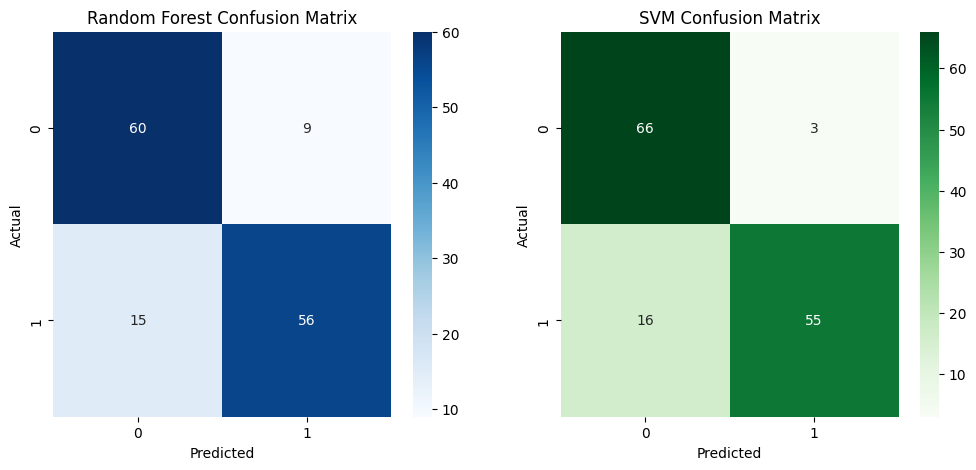

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()
